<a href="https://colab.research.google.com/github/diputs03/AI-Studies/blob/main/From-tensorflow-mnist-tutorial/dynamic_architect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Aiming a Dynaimic Graph-structured NeuronNetwork
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy

[<__main__.Model.Neuron object at 0x7d387be3b190>, <__main__.Model.Neuron object at 0x7d387bf69990>]
[<__main__.Model.Neuron object at 0x7d387be3b250>, <__main__.Model.Neuron object at 0x7d387bcf6210>]
[[0.9444527266801629, 0.9444527266801629], [0.9386925109628517, 0.9386925109628517]]
new node mid_0(output_0())
[[0.9437617584938564, 0.9444527266801629], [0.931604147455801, 0.9386925109628517]]
0.196611933241482
0.196611933241482
input_0(output_1()mid_0(output_0()))input_1(output_0()output_1())


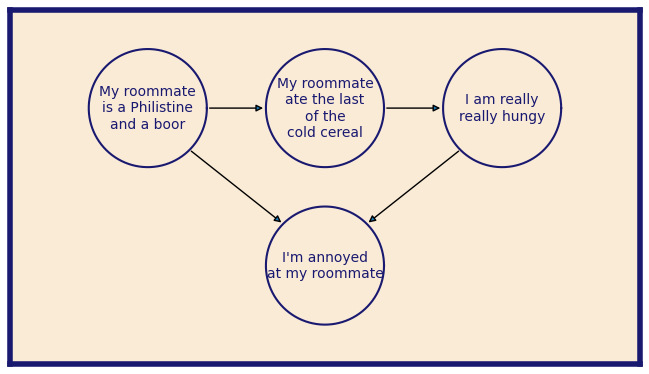

In [10]:
#@title Model Class
class Model:
  def relu(x) -> float:
    if x >= 0: return x
    else: return 0
  def sigmoid(x) -> float:
    return 1/(1 + np.e**(-x))
  def linear(x) -> float:
    return x
  def nul(x) -> float:
    return x
# Neuron
  class Neuron:
    name = ''
    prev, next = [], []
    bias = 1
    func = None
    def __init__(self, name, prev, next, func) -> None:
      self.name = name
      self.prev = prev
      self.next = next
      self.func = func
    def __str__(self) -> str:
      ret = str(self.name) + '('
      for n in self.next:
        ret += str(n)
      return ret + ')'
# Model handles
  Input_layer, Output_layer, all_neurons = [], [], []
  links = {}
  cache = {}
  def __init__(self, input_size, output_size):
    for i in range(input_size):
      self.Input_layer += [Model.Neuron(name=f'input_{i}',
                                        prev=[], next=[], func=Model.sigmoid)]
    for o in range(output_size):
      self.Output_layer += [Model.Neuron(name=f'output_{o}',
                                         prev=[], next=[], func=Model.sigmoid)]
    for u in self.Input_layer:
      for v in self.Output_layer:
        self.links[(u,v)] = 1
        u.next.append(v)
        v.prev.append(u)
    self.all_neurons += self.Input_layer+self.Output_layer

  def __len__(self):
    return len(self.all_neurons)

  def forward(self, X):
    for x in X: assert len(x) == len(self.Input_layer), 'invalid input'
    l = len(X)
    stack = self.Input_layer.copy()
# we have to cache the input in something because this is not a layered graph
    self.cache, cnt = {}, {}
    for n in self.all_neurons:
      self.cache[n], cnt[n] = [0] * l, 0
    for e in range(l):
      for i in range(len(self.Input_layer)):
        self.cache[self.Input_layer[i]][e] = X[e][i]
# stack for nodes to be pushed
    while len(stack) != 0:
      c = stack.pop()
      for e in range(l):
        self.cache[c][e] = c.func(self.cache[c][e]+c.bias)
      for n in c.next:
        for e in range(l):
          self.cache[n][e] += self.links[(c,n)] * self.cache[c][e]
        cnt[n] += 1
        if cnt[n] == len(n.prev):
          stack.append(n)
    ret = [[] for _ in range(l)]
    for e in range(l):
      for o in self.Output_layer:
        ret[e] += [self.cache[o][e]]
    return ret

  def backward(self, X, Y, loss, learning_rate):
    assert len(X) == len(Y), 'invalid input'
    for x in X: assert len(x) == len(self.Input_layer), 'invalid input'
    for y in Y: assert len(y) == len(self.Output_layer), 'invalid input'
    self.forward(X)
    stack = self.Output_layer.copy()
    cache_back, cnt = {}, {}
    y_hat = self.forward(X)
    for n in self.all_neurons:
      cache_back[n], cnt[n] = 0, 0
    for e in range(len(y_hat)):
      for o in range(len(self.Output_layer)):
        x = sympy.symbols('x')
        deri = sympy.diff(self.Output_layer[e].func(x), x)
        print(deri.evalf(subs={x: 1}))
        cache_back[self.Output_layer[o]] = Y[e][o] - y_hat[e][o]

    while len(stack) != 0:
      c = stack.pop()
      for p in c.prev:
        if cnt[p] == len(p.next):
          stack.append(p)
    return None

  def train(self, X, y, epochs, learning_rate):
      for epoch in range(epochs):
          output = self.forward(X)
          self.backward(X, y, learning_rate)
          if epoch % 4000 == 0:
              loss = np.mean(np.square(y - output))
              print(f"Epoch {epoch}, Loss:{loss}")

  def plot(self):
    def blank_diagram(fig_width=16, fig_height=9,
                  bg_color="antiquewhite", color="midnightblue"):
      fig = plt.figure(figsize=(fig_width / 2.54, fig_height / 2.54))
      ax = fig.add_axes((0, 0, 1, 1))
      ax.set_xlim(0, fig_width)
      ax.set_ylim(0, fig_height)
      ax.set_facecolor(bg_color)

      ax.tick_params(bottom=False, top=False,
                    left=False, right=False)
      ax.tick_params(labelbottom=False, labeltop=False,
                    labelleft=False, labelright=False)

      ax.spines["top"].set_color(color)
      ax.spines["bottom"].set_color(color)
      ax.spines["left"].set_color(color)
      ax.spines["right"].set_color(color)
      ax.spines["top"].set_linewidth(4)
      ax.spines["bottom"].set_linewidth(4)
      ax.spines["left"].set_linewidth(4)
      ax.spines["right"].set_linewidth(4)

      return fig, ax
    fig, ax = blank_diagram()

    centers = [(3.5, 6.5), (8, 6.5), (12.5, 6.5), (8, 2.5)]
    radii = 1.5
    texts = [
        "\n".join(["My roommate", "is a Philistine", "and a boor"]),
        "\n".join(["My roommate", "ate the last", "of the", "cold cereal"]),
        "\n".join(["I am really", "really hungy"]),
        "\n".join(["I'm annoyed", "at my roommate"]),
    ]

    # Draw circles with text in the center

    for i, center in enumerate(centers):
        x, y = center
        theta = np.linspace(0, 2 * np.pi, 100)
        ax.plot(
            x + radii * np.cos(theta),
            y + radii * np.sin(theta),
            color="midnightblue",
        )
        ax.text(
            x, y,
            texts[i],
            horizontalalignment="center",
            verticalalignment="center",
            color="midnightblue",
        )

    ax.annotate(
        "",
        (centers[1][0] - radii, centers[1][1]),
        (centers[0][0] + radii, centers[0][1]),
        arrowprops=dict(arrowstyle = "-|>"),
    )
    ax.annotate(
        "",
        (centers[2][0] - radii, centers[2][1]),
        (centers[1][0] + radii, centers[1][1]),
        arrowprops=dict(arrowstyle = "-|>"),
    )
    ax.annotate(
        "",
        (centers[3][0] - .7 * radii, centers[3][1] + .7 * radii),
        (centers[0][0] + .7 * radii, centers[0][1] - .7 * radii),
        arrowprops=dict(arrowstyle = "-|>"),
    )
    ax.annotate(
        "",
        (centers[3][0] + .7 * radii, centers[3][1] + .7 * radii),
        (centers[2][0] - .7 * radii, centers[2][1] - .7 * radii),
        arrowprops=dict(arrowstyle = "-|>"),
    )
    fig.show()
  def __str__(self):
    ret=''
    for i in self.Input_layer:
      ret += i.__str__()
    return ret


# tests
  def Add_Layer(self):
    assert(len(self.Input_layer) != 0)
    assert(len(self.Output_layer) != 0)
    u = self.Input_layer[0]
    v = self.Output_layer[0]
    self.links.pop((u, v))
    n = Model.Neuron(name=f'mid_{0}', prev=[u], next=[v], func=Model.sigmoid)
    self.links[(u, n)] = 1
    self.links[(n, v)] = 1
    self.all_neurons.append(n)
    u.next.remove(v)
    u.next.append(n)
    v.prev.remove(u)
    v.prev.append(n)
    print('new node', n)

# testing code
mod=Model(2, 2)
print(mod.Input_layer)
print(mod.Output_layer)
print(mod.forward([[1, 2], [5, 0]]))
mod.Add_Layer()
print(mod.forward([[1, 2], [5, 0]]))
mod.backward([[1, 2]], [[1, 2]], lambda x: x, 0.1)
mod.plot()
print(mod)